In [393]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter
stop_words = set(stopwords.words('english')) 
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [394]:
files = glob.glob('/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/*.csv')

In [395]:
df_news = df_science = df_jobs = df_business = df_health = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
#     df = pd.read_csv(f)
#     df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
#     df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
#     df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
#     df_april = df_april.append(df[(df.years == 2020) & (df.months == 4)], ignore_index=True)
#     df_may = df_may.append(df[(df.years == 2020) & (df.months == 5)], ignore_index=True)
#     df_june = df_june.append(df[(df.years == 2020) & (df.months == 6)], ignore_index=True)
    df = pd.read_csv(f)
    df_news = df_news.append(df[df['all_categories'] == "News"], ignore_index=True)
    df_science = df_science.append(df[df['all_categories'] == "Science"], ignore_index=True)
    df_jobs = df_jobs.append(df[df['all_categories'] == "Jobs & Education"], ignore_index=True)
    df_business = df_business.append(df[df['all_categories'] == "Business & Industrial"], ignore_index=True)
    df_health = df_business.append(df[df['all_categories'] == "Health"], ignore_index=True)
df_news

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ratings,action,dislikes,likes,...,days,hours,minutes,weekdays,link,titles,source,query,datetime,all_categories
0,62,62,62,62,815,815,NaN,Searched,NaN,NaN,...,7,2,46,1,NaN,NaN,search,pichai net worth,2020-01-07 02:46:00,News
1,67,67,67,67,809,809,NaN,Searched,NaN,NaN,...,7,2,51,1,NaN,NaN,search,josep maria bartomeu floreta net worth,2020-01-07 02:51:00,News
2,71,71,71,71,805,805,NaN,Searched,NaN,NaN,...,7,2,55,1,NaN,NaN,search,richest athlete,2020-01-07 02:55:00,News
3,103,103,103,103,773,773,NaN,Visited,NaN,NaN,...,7,19,35,1,NaN,NaN,search,What China Is Really Up To In Africa - Forbes,2020-01-07 19:35:00,News
4,253,253,253,253,623,623,NaN,Searched,NaN,NaN,...,17,19,15,4,NaN,NaN,search,kagame election 2017,2020-01-17 19:15:00,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,3937,3937,3937,3937,928,585,NaN,Visited,NaN,NaN,...,29,16,25,2,NaN,NaN,search,"Section III HS scoreboard for Thursday, Sept. ...",2020-04-29 16:25:00,News
2403,3953,3953,3953,3953,912,569,NaN,Visited,NaN,NaN,...,30,12,1,3,NaN,NaN,search,Obituaries | nny360.com - Watertown Daily Times,2020-04-30 12:01:00,News
2404,4009,4009,4009,4009,881,538,NaN,Visited,NaN,NaN,...,30,15,42,3,NaN,NaN,search,Watertown Daily Times,2020-04-30 15:42:00,News
2405,4237,4237,4237,4237,657,314,NaN,Visited,NaN,NaN,...,10,21,41,6,NaN,NaN,search,"Amid Ongoing COVID-19 Pandemic, Governor Cuomo...",2020-05-10 21:41:00,News


In [396]:
def tokenize(df_name):
    text = df_name['query'].tolist()
    map(word_tokenize, text)
    df_name['query'].apply(word_tokenize)
    df_name['query'].apply(word_tokenize).tolist()
    tag_list = nltk.pos_tag_sents(df_name['query'].apply(word_tokenize).tolist())
    return tag_list


In [397]:
def get_nouns(tagged_list):
    noun_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("NN" or "NNP" or "NNS" or "NNPS")]
        noun_list.append(temp)

    noun_list = [[x.lower() for x in sublst] for sublst in noun_list]
    return noun_list

In [398]:
def get_adj(tagged_list):
    adj_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("JJ" or "JJR" or "JJS")]
        adj_list.append(temp)

    adj_list = [[x.lower() for x in sublst] for sublst in adj_list]
    return adj_list

In [399]:
def get_verbs(tagged_list):
    verb_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("VB" or "VBD" or "VBG" or "VBN" or "VBP" or "VBZ")]
        verb_list.append(temp)

    verb_list = [[x.lower() for x in sublst] for sublst in verb_list]
    return verb_list

In [400]:
get_verbs(tokenize(df_news))


[[],
 ['bartomeu'],
 [],
 ['is'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['|'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['wants', 'send'],
 [],
 ['defends'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['breaking'],
 [],
 [],
 [],
 ['won'],
 [],
 ['warning', 'issued'],
 [],
 ['open'],
 ['make'],
 ['did', 'have'],
 [],
 ['pardon'],
 ['is'],
 [],
 [],
 ['has'],
 [],
 [],
 [],
 [],
 ['is', 'did', 'lie', 'did', 'die'],
 [],
 [],
 [],
 ['is', 'correct'],
 [],
 [],
 ['shit'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['invade', 'kill'],
 [],
 [],
 ['has'],
 [],
 [],
 ['love', 'pick'],
 ['carpet'],
 [],
 ['says', 'believe', 'promotes'],
 ['|'],
 ["d'état"],
 [],
 [],
 [],
 [],
 ['earn'],
 [],
 ['is'],
 ['is', 'hypocrisy', 'am'],
 ['is'],
 ['is'],
 ['|'],
 ['is'],
 ['did', 'obama', 'become'],
 [],
 [],
 [],
 [],
 [],
 ['ask', 'call'],
 ['anthem'],
 ['love', 'see', "'s"],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['obama'],
 [],
 [],
 [],
 [],
 ['

In [401]:
# verb_health_queries_pop_list = ['do-have', 'get','causes', 'treat', 'do-need', 'help', 'apply', 'understanding', 'testing', 'does-take', 'taking']
# adj_health_queries_pop_list = ['medical', 'dental', 'free', 'infectious', 'mental', 'common', 'american', 'many', 'pregnant', 'strong', 'best', 'much']
# noun_health_queries_pop_list = ['university-rochester', 'side-effects', 'heat-transfer', 'disease-covid-19', 'cdc', 'cvs', 'covid-19-situation', 'medical-school', 'rochester-medical', 'service-uhs', 'coronavirus-update', 'situation-dashboard', 'type-diabetes', 'medical-center', 'university-health', 'developmental-behavioral', 'coronavirus-symptoms', 'health-service', 'causes-tratment', 'mayo-clinic']


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

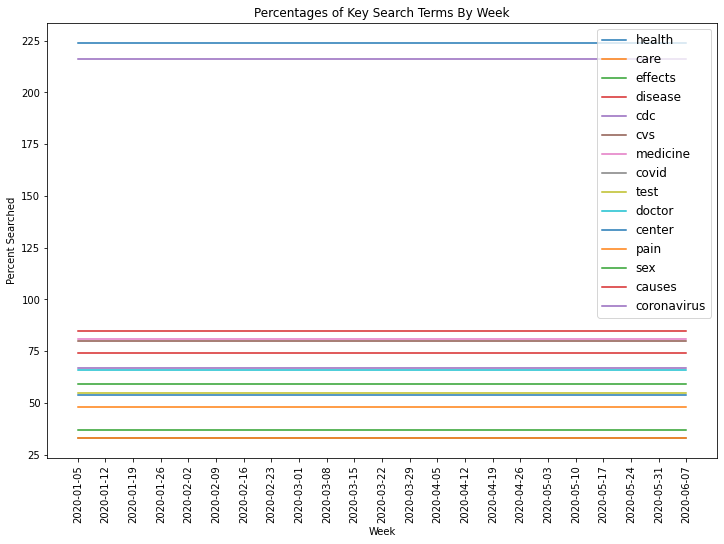

In [402]:
df_health['datetime']= pd.to_datetime(df_health['datetime'])
D = {
    'health': 'health',
    'care': 'care',
    'effects': 'effects',
    'effect': 'effects',
    'diseas': 'disease',
    'disease': 'disease',
    'cdc': 'cdc',
    'cv': 'cvs',
    'cvs': 'cvs',
    'medicin': 'medicine',
    'medicine': 'medicine',
    'covid': 'covid',
    'test': 'test',
    'doctor': 'doctor',
    'center': 'center',
    'pain': 'pain',
    'sex': 'sex',
    'caus': 'causes',
    'causes': 'causes',
    'coronaviru': 'coronavirus',
    'coronavirus': 'coronavirus'
}

d_noun = {
    'health': 0,
    'care': 1,
    'effects': 2,
    'disease': 3,
    'cdc': 4,
    'cvs': 5,
    'medicine': 6,
    'covid': 7,
    'test': 8,
    'doctor': 9,
    'center': 10,
    'pain': 11,
    'sex': 12,
    'causes': 13,
    'coronavirus': 14
}


d_noun_2 = {
    0: 'health',
    1: 'care',
    2: 'effects',
    3: 'disease',
    4: 'cdc',
    5: 'cvs',
    6: 'medicine',
    7:'covid',
    8: 'test',
    9: 'doctor',
    10: 'center',
    11: 'pain',
    12: 'sex',
    13: 'causes',
    14: 'coronavirus'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_health.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(15)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))

        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tag = nltk.pos_tag_sents(q)
            get_nouns(tag)
            for n in noun_list:
                for w in n:
                    if w in D: 
                        wdist[d_noun[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_noun[D[ps.stem(w)]]]+=1
        history.append(wdist)

history = np.array(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_noun_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")


# To do:
#     change dictionary to include stemmed versions
#     just covid stuff
#     plot with all
# sync with Anis
# then plot from 2019

Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

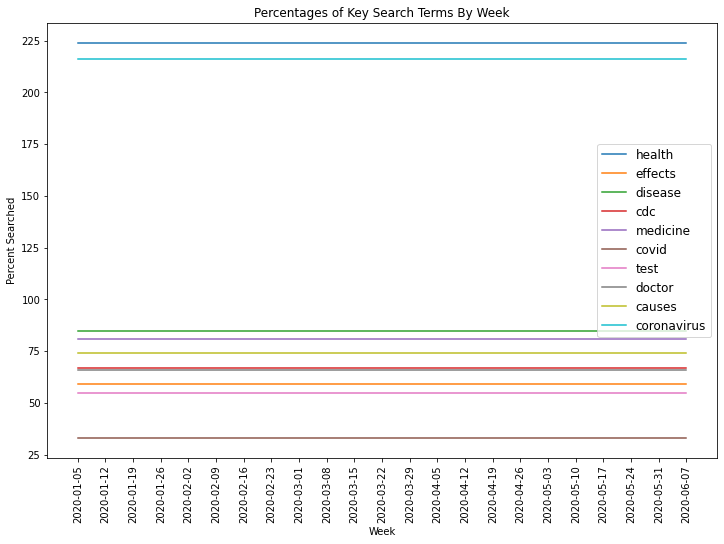

In [403]:
df_health['datetime']= pd.to_datetime(df_health['datetime'])
D = {
    'health': 'health',
    'effects': 'effects',
    'effect': 'effects',
    'diseas': 'disease',
    'disease': 'disease',
    'cdc': 'cdc',
    'medicin': 'medicine',
    'medicine': 'medicine',
    'covid': 'covid',
    'test': 'test',
    'doctor': 'doctor',
    'caus': 'causes',
    'causes': 'causes',
    'coronaviru': 'coronavirus',
    'coronavirus': 'coronavirus'
}

d_covid = {
    'health': 0,
    'effects': 1,
    'disease': 2,
    'cdc': 3,
    'medicine': 4,
    'covid': 5,
    'test': 6,
    'doctor': 7,
    'causes': 8,
    'coronavirus': 9
}


d_covid_2 = {
    0: 'health',
    1: 'effects',
    2: 'disease',
    3: 'cdc',
    4: 'medicine',
    5:'covid',
    6: 'test',
    7: 'doctor',
    8: 'causes',
    9: 'coronavirus'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_health.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(10)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))

        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tag = nltk.pos_tag_sents(q)
            get_nouns(tag)
            for n in noun_list:
                for w in n:
                    if w in D: 
                        wdist[d_covid[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_covid[D[ps.stem(w)]]]+=1
        history.append(wdist)

history = np.array(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_covid_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")



Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

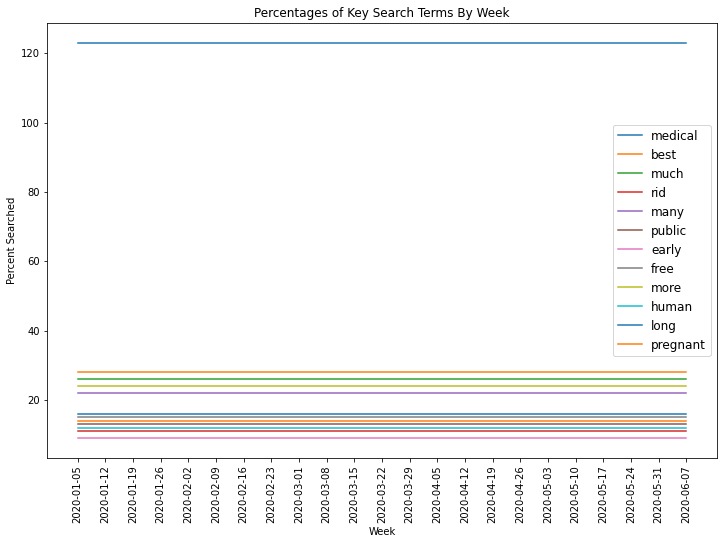

In [404]:
df_health['datetime']= pd.to_datetime(df_health['datetime'])
D = {
    'medic':'medical',
    'medical': 'medical',
    'best':'best',
    'much':'much',
    'rid': 'rid',
    'mani': 'many',
    'many': 'many',
    'public':'public',
    'earli' : 'early',
    'early':'early',
    'free': 'free',
    'more': 'more',
    'human': 'human',
    'long':'long',
    'pregnant':'pregnant'
}

d_adj = {
    'medical': 0,
    'best': 1,
    'much': 2,
    'rid': 3,
    'many': 4,
    'public': 5,
    'early': 6,
    'free': 7,
    'more': 8,
    'human': 9,
    'long': 10,
    'pregnant': 11
}

d_adj_2 = {
    0: 'medical',
    1: 'best',
    2: 'much',
    3: 'rid',
    4: 'many',
    5: 'public',
    6: 'early',
    7: 'free',
    8: 'more',
    9: 'human',
    10: 'long',
    11: 'pregnant'
    
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_health.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(12)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tag = nltk.pos_tag_sents(q)
            get_adj(tag)
            for n in adj_list:
                for w in n:
                    if w in D: 
                        wdist[d_adj[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_adj[D[ps.stem(w)]]]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_adj_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

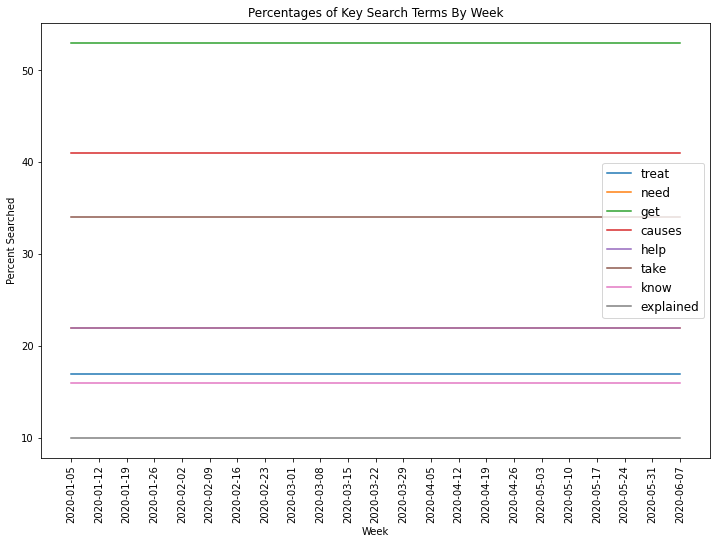

In [406]:
df_health['datetime']= pd.to_datetime(df_health['datetime'])
D = {
    'treat':'treat',
    'need':'need',
    'get':'get',
    'caus': 'causes',
    'causes': 'causes',
    'help': 'help',
    'take': 'take',
    'know':'know',
    'explain': 'explained',
    'explained': 'explained'
}

d_verb = {
    'treat': 0,
    'need': 1,
    'get': 2,
    'causes': 3,
    'help': 4,
    'take': 5,
    'know': 6,
    'explained': 7
}

d_verb_2 = {
    0: 'treat',
    1: 'need',
    2: 'get',
    3: 'causes',
    4: 'help',
    5: 'take',
    6: 'know',
    7: 'explained'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_health.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(8)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tag = nltk.pos_tag_sents(q)
            get_verbs(tag)
            for n in verb_list:
                for w in n:
                    if w in D: 
                        wdist[d_verb[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_verb[D[ps.stem(w)]]]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_verb_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

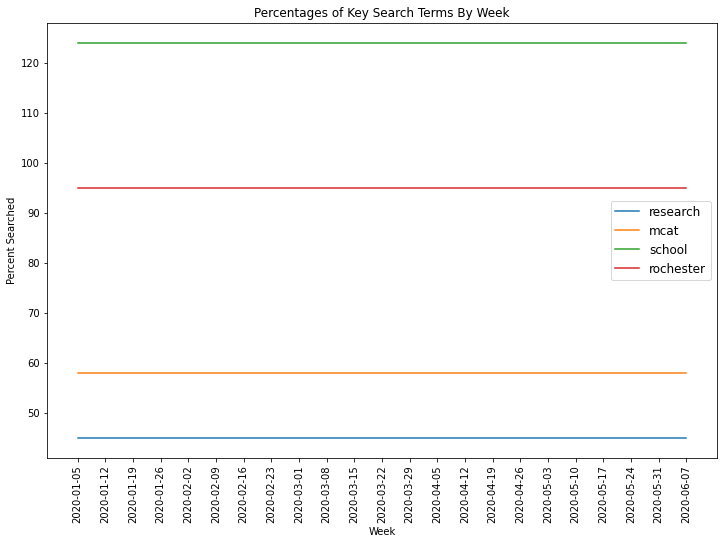

In [407]:
df_health['datetime']= pd.to_datetime(df_health['datetime'])

D = {
    'research':'research',
    'mcat': 'mcat',
    'school': 'school',
    'rochest': 'rochester',
    'rochester': 'rochester'
}

d_school = {
    'research': 0,
    'mcat': 1,
    'school': 2,
    'rochester': 3
}

d_school_2 = {
    0: 'research',
    1: 'mcat',
    2: 'school',
    3: 'rochester'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_health.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(4)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tag = nltk.pos_tag_sents(q)
            get_nouns(tag)
            for n in noun_list:
                for w in n:
                    if w in D: 
                        wdist[d_school[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_school[D[ps.stem(w)]]]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_school_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")


In [ ]:
# def bigram(list_name): 
#     string = ""
#     for l in list_name:
#         if len(l) > 1:
#             for word in l:
#                 string = string + " " + word
#             tokens = nltk.word_tokenize(string)  
#             bigrm = nltk.bigrams(tokens) 
#             print(*map('-'.join, bigrm), sep=', ')
#         else:
#             print(l)
#         string = ""

In [ ]:
ps = PorterStemmer() 

print(ps.stem('democracy'))


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

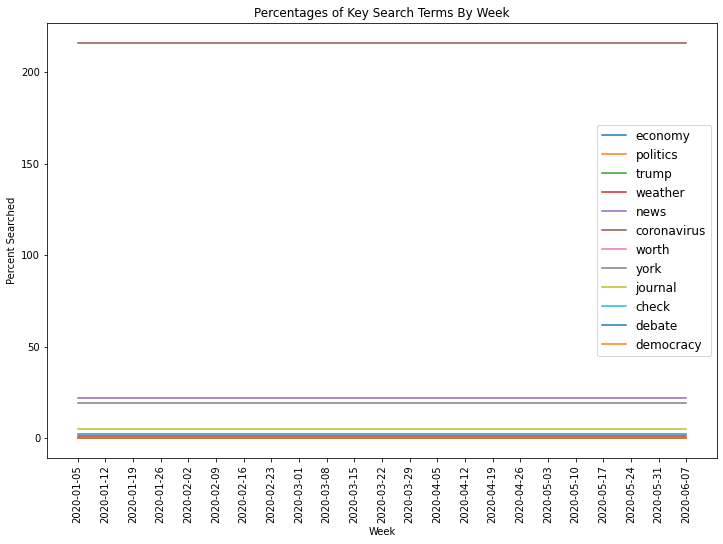

In [409]:
df_news['datetime']= pd.to_datetime(df_news['datetime'])
D = {
    'economy': 'economy',
    'economi': 'economy',
    'polit':'politics',
    'politics': 'politics',
    'trump': 'trump',
    'weather': 'weather',
    'news': 'news',
    'coronavirus': 'coronavirus',
    'coronaviru': 'coronavirus',
    'worth': 'worth',
    'york': 'york',
    'journal': 'journal',
    'check': 'check',
    'debate': 'debate',
    'debat':'debate',
    'democracy': 'democracy',
    'democraci': 'democracy'
}

d_news_noun = {
    'economy': 0,
    'politics': 1,
    'trump': 2,
    'weather': 3,
    'news': 4,
    'coronavirus': 5,
    'worth': 6,
    'york': 7,
    'journal': 8,
    'check': 9,
    'debate': 10,
    'democracy': 11
}


d_news_noun_2 = {
    0: 'economy',
    1: 'politics',
    2: 'trump',
    3: 'weather',
    4: 'news',
    5: 'coronavirus',
    6: 'worth',
    7:'york',
    8: 'journal',
    9: 'check',
    10: 'debate',
    11: 'democracy'
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df_news.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(12)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))

        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        for q in weekly_queries:
            tagged_list = nltk.pos_tag_sents(q)
            get_nouns(tagged_list)
            for n in noun_list:
                for w in n:
                    if w in D: 
                        wdist[d_news_noun[D[w]]]+=1
                    elif ps.stem(w) in D:
                        wdist[d_news_noun[D[ps.stem(w)]]]+=1
        history.append(wdist)

history = np.array(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_news_noun_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")